<a href="https://colab.research.google.com/github/NARAYANAN0101/MACHINE-LEARNING/blob/main/k_mean_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
dataset=pd.read_csv('/content/life_expectancy.csv')
dataset

,Country,Sum of Females Life Expectancy,Sum of Life Expectancy (both sexes),Sum of Males Life Expectancy
0,Chad,57.19,55.24,53.36
1,Nigeria,54.94,54.64,54.33
2,South Sudan,60.75,57.74,54.76
3,Lesotho,60.44,57.80,55.03
4,Central African Republic,59.56,57.67,55.51
...,...,...,...,...
195,Switzerland,85.95,84.09,82.17
196,United Arab Emirates,84.32,83.07,82.17
197,Australia,85.85,84.07,82.28
198,Hong Kong,88.26,85.63,82.97


In [6]:
# 2. Select numerical columns for clustering
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
data = dataset[numeric_cols].dropna()  # drop missing values
data

,Sum of Females Life Expectancy,Sum of Life Expectancy (both sexes),Sum of Males Life Expectancy
0,57.19,55.24,53.36
1,54.94,54.64,54.33
2,60.75,57.74,54.76
3,60.44,57.80,55.03
4,59.56,57.67,55.51
...,...,...,...
195,85.95,84.09,82.17
196,84.32,83.07,82.17
197,85.85,84.07,82.28
198,88.26,85.63,82.97


In [7]:
# 3. Standardize the data (important for K-Means!)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[-2.22622585e+00, -2.20982487e+00, -2.16194280e+00],
       [-2.48195842e+00, -2.28000143e+00, -2.04644677e+00],
       [-1.82160011e+00, -1.91742252e+00, -1.99524750e+00],
       [-1.85683437e+00, -1.91040487e+00, -1.96309912e+00],
       [-1.95685422e+00, -1.92560979e+00, -1.90594644e+00],
       [-1.73067297e+00, -1.77356057e+00, -1.78925973e+00],
       [-1.51699421e+00, -1.50221119e+00, -1.47730138e+00],
       [-1.66247762e+00, -1.57355737e+00, -1.46063185e+00],
       [-1.63178971e+00, -1.54080830e+00, -1.42848347e+00],
       [-1.66929716e+00, -1.54782596e+00, -1.41181394e+00],
       [-1.42606707e+00, -1.41098166e+00, -1.37609352e+00],
       [-1.41697436e+00, -1.40630323e+00, -1.35108923e+00],
       [-1.48630630e+00, -1.42384737e+00, -1.34394514e+00],
       [-1.14078319e+00, -1.20863924e+00, -1.31298744e+00],
       [-1.63292630e+00, -1.48583666e+00, -1.31298744e+00],
       [-1.30331544e+00, -1.29519034e+00, -1.31298744e+00],
       [-1.49426242e+00, -1.38174143e+00

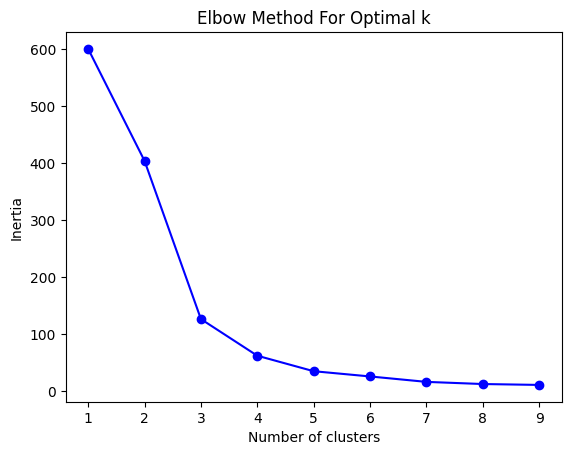

In [8]:
# 4. Find optimal number of clusters using Elbow Method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


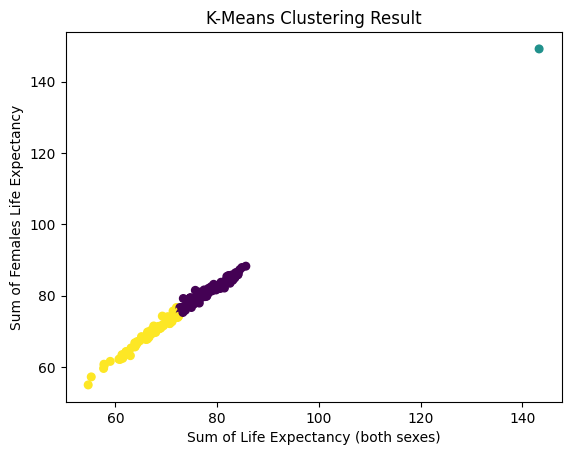

In [12]:
# 5. Apply K-Means with chosen k (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_data)

# 6. Add cluster labels to the original data
dataset['Cluster'] = kmeans.labels_

# 7. Visualize clusters using two features (for simplicity)
plt.scatter(dataset['Sum of Life Expectancy  (both sexes)'],dataset['Sum of Females  Life Expectancy'], c=dataset['Cluster'], cmap='viridis', s=30)
plt.xlabel('Sum of Life Expectancy (both sexes)')
plt.ylabel('Sum of Females Life Expectancy')
plt.title('K-Means Clustering Result')
plt.show()

In [16]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_data, dataset['Cluster'])

print(f"The average Silhouette Score for the clustering is: {silhouette_avg:.4f}")

The average Silhouette Score for the clustering is: 0.5716
